Ví dụ A.1: liệu vui, với đầu vào một biến, đầu ra phân loại 02 lớp (nguồn từ
https://en.wikipedia.org/wiki/Logistic_regression): Một nhóm 20 sinh viên dành thời gian trong khoảng từ 0 đến 6
giờ cho việc ôn thi. Thời gian ôn thi này ảnh hưởng đến xác suất sinh viên vượt qua kỳ thi như thế nào?




In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

np.random.seed(2)  # để lần sau chạy lại vẫn ra giống nhau
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X, y = shuffle(X, y, random_state = 42)

X_new = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
# X_train, X_val = X[:16], X[16:]
# y_train, y_val = y[:16], y[16:]
X = X.flatten()
print(X)
print(y)



[0.5  4.75 4.25 0.75 2.25 1.75 3.   1.25 5.   4.5  3.5  1.   2.5  5.5
 1.5  3.25 2.   2.75 4.   1.75]
[0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1]


In [198]:
# Hàm tính khoảng cách
def distance(array, value):
    return np.abs(np.array(array) - value)

In [199]:
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    ids = np.argsort(array_D)[:k]
    return ids, array_D[ids]

In [200]:
def predict_by_knn(X, y, value, k):
    array_D = distance(X, value)
    ids = np.argsort(array_D)[:k]
    y_pred = 0
    for i in range(k):
        y_pred = y_pred + y[ids[i]]
    y_pred = y_pred/k
    if (y_pred >= 0.5):
        y_pred = 1
    else:
        y_pred = 0
    return y_pred

X_new = [2.45, 1.85, 3.75, 3.21, 4.05]



In [201]:
for K in [3,4,5]:
    y_pred = [predict_by_knn(X,y,x,K) for x in X_new]
    print(f"K = {K}: {y_pred}")

K = 3: [1, 0, 1, 0, 1]
K = 4: [1, 0, 1, 1, 1]
K = 5: [0, 0, 1, 0, 1]


Ví dụ A.2. Xét lại Ví dụ B.4 ở phần Hồi quy tuyến tính (bài thực hành số 2), với dữ liệu trong tệp vidu4_lin_reg.txt
(tệp văn bản). Trong y sinh học, bề dày lớp nội trung mạc (NTM) phản ánh một số bệnh lý của cơ thể. Một nghiên
cứu cho thấy nếu độ dày lớp nội trung mạc (NTM) lớn hơn hoặc bằng 1.0mm, bệnh nhân có nguy cơ cao mắc bệnh
đái tháo đường Type 2.

In [202]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 1. Đọc dữ liệu
data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/vidu4_lin_reg.txt",
                   sep="\s+")

# 2. Tạo cột nhãn Y
data['Y'] = (data['BEDAYNTM'] >= 1.0).astype(int)

# 3. Chia X và y
X = data.drop(columns=['ID', 'BEDAYNTM', 'Y'])
y = data['Y']


In [203]:
# 4. Chia train và validation
X_train = X.iloc[:80]
X_val   = X.iloc[80:100]
y_train = y.iloc[:80]
y_val   = y.iloc[80:100]

# 5. Huấn luyện KNN với k=5
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# 6. Dự đoán trên tập validation
y_pred = knn.predict(X_val)

In [204]:
# 7. Tính các độ đo đánh giá
acc = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

# 8. In kết quả
print("Kết quả đánh giá KNN:")
print("Accuracy :", acc)
print("Precision:", precision)
print("Recall   :", recall)
print("Confusion Matrix:\n", cm)

Kết quả đánh giá KNN:
Accuracy : 0.65
Precision: 0.6666666666666666
Recall   : 0.4444444444444444
Confusion Matrix:
 [[9 2]
 [5 4]]


B. PHƯƠNG PHÁP HỒI QUY LOGISTIC


Ví dụ B.1. Chúng ta sử dụng lại dữ liệu trong Ví dụ A.1. Tuy nhiên bây giờ ta sẽ áp dụng mô hình hồi quy Logistic
cho ví dụ này.

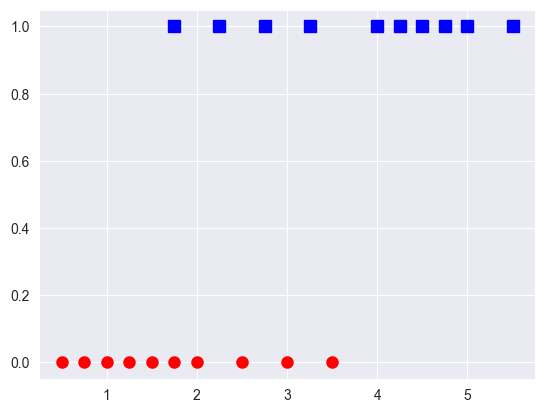

In [205]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)
x0 = X[1,np.where(y==0)][0]
y0 =  y[np.where(y==0)]
x1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(x0, y0, 'ro', markersize = 8)
plt.plot(x1, y1, 'bs', markersize = 8)
plt.show()

In [206]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d,1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            
            if count%check_w_after == 0:
                if len(w) >= check_w_after:
                    if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                        return w
                w.append(w_new)
                
    return w 

In [207]:
eta = 0.05    
d = X.shape[0]
w_init = np.random.randn(d,1)
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])


[[-2.09541716]
 [ 1.02092459]]


In [208]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.1700949  0.20920507 0.25454966 0.30592046 0.36261544 0.42340788
  0.42340788 0.48661121 0.55024562 0.61227716 0.67087064 0.7245923
  0.77251862 0.81424291 0.87956118 0.90408945 0.92405369 0.94013743
  0.95298828 0.97124223]]


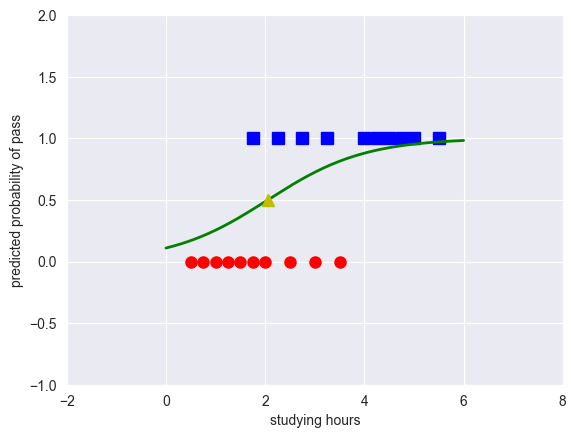

In [209]:
x0 = X[1,np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
x1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(x0,y0,'ro', markersize = 8)
plt.plot(x1,y1,'bs', markersize =8)

xx = np.linspace(0,6,2000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]

threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [210]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# ====== Dữ liệu gốc (ví dụ B.1) ======
# Số giờ học
X = np.array([0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0]).reshape(-1, 1)
# Kết quả (0 = trượt, 1 = qua)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

# ====== Huấn luyện Logistic Regression ======
log_reg = LogisticRegression()
log_reg.fit(X, y)
# Bộ hệ số
w0 = log_reg.intercept_[0]
w1 = log_reg.coef_[0][0]
print("Bộ hệ số Logistic Regression:")
print(f"w0 = {w0:.3f}, w1 = {w1:.3f}")


Bộ hệ số Logistic Regression:
w0 = -3.635, w1 = 1.471


In [211]:
# ====== Dữ liệu cần dự đoán (SV 21–25) ======
hours_new = np.array([2.45, 1.85, 3.75, 3.21, 4.05]).reshape(-1, 1)

# Dự đoán với Logistic Regression
proba = log_reg.predict_proba(hours_new)[:, 1]   # xác suất qua
pred_log = log_reg.predict(hours_new)

print("\nDự đoán Logistic Regression:")
for i, (h, p, pred) in enumerate(zip(hours_new.flatten(), proba, pred_log), start=21):
    print(f"Student {i}: Hours = {h}, P(pass) = {p:.3f}, Kết quả = {pred}")



Dự đoán Logistic Regression:
Student 21: Hours = 2.45, P(pass) = 0.492, Kết quả = 0
Student 22: Hours = 1.85, P(pass) = 0.286, Kết quả = 0
Student 23: Hours = 3.75, P(pass) = 0.868, Kết quả = 1
Student 24: Hours = 3.21, P(pass) = 0.748, Kết quả = 1
Student 25: Hours = 4.05, P(pass) = 0.911, Kết quả = 1


In [212]:
# ====== So sánh với K-NN (k=3 chẳng hạn) ======
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
pred_knn = knn.predict(hours_new)

print("\nSo sánh với K-NN (k=3):")
for i, (h, pred) in enumerate(zip(hours_new.flatten(), pred_knn), start=21):
    print(f"Student {i}: Hours = {h}, Kết quả K-NN = {pred}")


So sánh với K-NN (k=3):
Student 21: Hours = 2.45, Kết quả K-NN = 1
Student 22: Hours = 1.85, Kết quả K-NN = 0
Student 23: Hours = 3.75, Kết quả K-NN = 1
Student 24: Hours = 3.21, Kết quả K-NN = 1
Student 25: Hours = 4.05, Kết quả K-NN = 1


Ví dụ B.1. Chúng ta sử dụng lại dữ liệu trong Ví dụ A.1. Tuy nhiên bây giờ ta sẽ áp dụng mô hình hồi quy Logistic
cho ví dụ này.

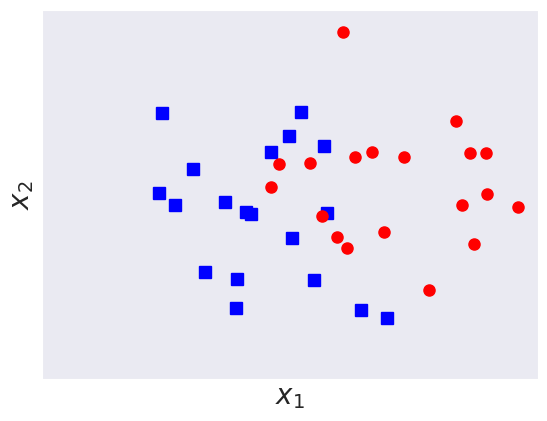

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


In [213]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init

# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])




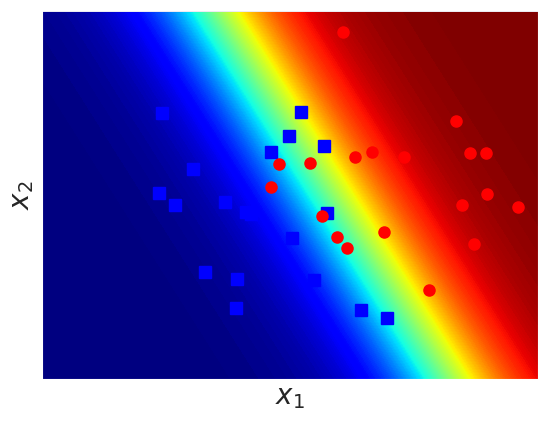

In [214]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

Ví dụ B.3 (Bài tập 1): Tiếp theo chúng ta xét một ví dụ được lấy từ dữ liệu tuyển sinh sau đại học (master) của Ấn
độ. Link lấy dữ liệu ở đây: https://www.kaggle.com/mohansacharya/graduate-admissions hoặc từ tệp
Admission_Predict.csv đính kèm.

In [215]:
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/Admission_Predict.csv")

data.columns = data.columns.str.strip()

sn = data['Serial No.'].tolist()

gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)

sop = data['SOP'].tolist()
X4 = np.asarray(sop)

lor1 = data['LOR'].tolist()   
X5 = np.asarray(lor1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)

prob_Admit = data['Chance of Admit'].tolist()   
Yt = np.asarray(prob_Admit)

print("X1 (GRE):", X1[:5])
print("X2 (TOEFL):", X2[:5])
print("Yt (Chance of Admit):", Yt[:5])


X1 (GRE): [337 324 316 322 314]
X2 (TOEFL): [118 107 104 110 103]
Yt (Chance of Admit): [0.92 0.76 0.72 0.8  0.65]


a) Phân loại bằng phương pháp hồi quy Logistic

In [216]:
import numpy as np
import pandas as pd

# --- Các hàm cần dùng ---

def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta=0.01, tol=1e-4, max_count=10000):
    w = [w_init]
    count = 0
    N = X.shape[1] 
    d = X.shape[0]  
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            if np.linalg.norm(w_new - w[-1]) < tol:
                return w
            w.append(w_new)
        count += 1
    return w

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/Admission_Predict.csv")
data.columns = data.columns.str.strip()  

Y = (data['Chance of Admit'] >= 0.75).astype(int).values
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values

X_train, X_test = X[:350], X[350:]
Y_train, Y_test = Y[:350], Y[350:]

Xbar_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1).T
Xbar_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1).T
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

d, N = Xbar_train.shape
w_init = np.random.randn(d, 1)
W = logistic_sigmoid_regression(Xbar_train, Y_train, w_init, eta=0.01, tol=1e-4, max_count=1000)
w_final = W[-1]

print("Hệ số hồi quy logistic:")
print(w_final.T)

def predict(Xbar, w):
    probs = sigmoid(np.dot(w.T, Xbar))
    return (probs >= 0.5).astype(int).flatten()

Y_pred = predict(Xbar_test, w_final)

# Tính Accuracy, Precision, Recall
TP = np.sum((Y_pred == 1) & (Y_test == 1))
TN = np.sum((Y_pred == 0) & (Y_test == 0))
FP = np.sum((Y_pred == 1) & (Y_test == 0))
FN = np.sum((Y_pred == 0) & (Y_test == 1))

accuracy = (TP + TN) / len(Y_test)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Hệ số hồi quy logistic:
[[ 0.78215625 -0.09376254 -0.32790016 -0.778159    0.6592273  -0.53469668
  -2.06722184 -1.2183609 ]]
Accuracy: 0.56
Precision: 0
Recall: 0.0


b, Dự đoán khả năng bằng hồi quy tuyến tính

In [217]:
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/Admission_Predict.csv")
data.columns = data.columns.str.strip()  

Y = data['Chance of Admit'].values
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values

X_train, X_test = X[:350], X[350:]
Y_train, Y_test = Y[:350], Y[350:]

Xbar_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
Xbar_test  = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

w = np.linalg.pinv(Xbar_train.T @ Xbar_train) @ (Xbar_train.T @ Y_train)

print("Hệ số hồi quy tuyến tính:")
print(w)
Y_pred = Xbar_test @ w
MSE = np.mean((Y_pred - Y_test) ** 2)
print("Mean Squared Error (MSE):", MSE)


Hệ số hồi quy tuyến tính:
[-1.19503649  0.00154891  0.00324646  0.00931544 -0.00438297  0.02493287
  0.11235144  0.02194172]
Mean Squared Error (MSE): 0.004641678440472409


c, Bài tập tự thực hành: Hãy sử dụng phương pháp Naïve Bayes

In [218]:
import numpy as np
import pandas as pd
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/Admission_Predict.csv")
data.columns = data.columns.str.strip()

X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
Y = (data['Chance of Admit'] >= 0.75).astype(int).values

# chia train/test
X_train, X_test = X[:350], X[350:]
Y_train, Y_test = Y[:350], Y[350:]

start_nb = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
Y_pred_nb = nb_model.predict(X_test)
end_nb = time.time()

start_lr = time.time()
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)
end_lr = time.time()

def evaluate(y_true, y_pred, name, runtime):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    print(f"\n{name}:")
    print("  Accuracy :", acc)
    print("  Precision:", pre)
    print("  Recall   :", rec)
    print("  Runtime  :", runtime, "seconds")

evaluate(Y_test, Y_pred_nb, "Naive Bayes", end_nb - start_nb)
evaluate(Y_test, Y_pred_lr, "Logistic Regression", end_lr - start_lr)



Naive Bayes:
  Accuracy : 0.9
  Precision: 0.9473684210526315
  Recall   : 0.8181818181818182
  Runtime  : 0.0011310577392578125 seconds

Logistic Regression:
  Accuracy : 0.9
  Precision: 0.9473684210526315
  Recall   : 0.8181818181818182
  Runtime  : 0.018757104873657227 seconds


d, Sử dụng thư viện Scikit-Learn

In [223]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/Admission_Predict.csv")
data.columns = data.columns.str.strip()

X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
Y = (data['Chance of Admit'] >= 0.75).astype(int).values

X_train, X_test = X[:350], X[350:]
Y_train, Y_test = Y[:350], Y[350:]

logReg = linear_model.LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
logReg.fit(X_train, Y_train)

print("Hệ số w (scikit-learn):")
print("Intercept:", logReg.intercept_)
print("Coefficients:", logReg.coef_)

Y_pred = logReg.predict(X_test)

acc = accuracy_score(Y_test, Y_pred)
pre = precision_score(Y_test, Y_pred, zero_division=0)
rec = recall_score(Y_test, Y_pred, zero_division=0)

print("Accuracy :", acc)
print("Precision:", pre)
print("Recall   :", rec)


Hệ số w (scikit-learn):
Intercept: [-57.15439235]
Coefficients: [[0.03749959 0.101816   0.44545258 0.37482418 0.56570126 3.33606973
  0.92532889]]
Accuracy : 0.9
Precision: 0.9473684210526315
Recall   : 0.8181818181818182


In [224]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score

def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta=0.01, tol=1e-4, max_count=10000):
    w = w_init
    N = X.shape[1]
    count = 0
    while count < max_count:
        y_pred = sigmoid(np.dot(w.T, X))
        grad = np.dot(X, (y_pred - y).T) / N
        w_new = w - eta * grad
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
        count += 1
    return w

data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/Admission_Predict.csv")
data.columns = data.columns.str.strip()

X = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']].values
Y = (data['Chance of Admit'] >= 0.75).astype(int).values

X_train, X_test = X[:350], X[350:]
Y_train, Y_test = Y[:350], Y[350:]

Xbar_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1).T
Y_train_vec = Y_train.reshape(1, -1)

d = Xbar_train.shape[0]
w_init = np.random.randn(d,1)
w = logistic_sigmoid_regression(Xbar_train, Y_train_vec, w_init)

print("Hệ số w (tự cài):")
print(w.T)

Xbar_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1).T
Y_pred_manual = sigmoid(np.dot(w.T, Xbar_test)) >= 0.5
Y_pred_manual = Y_pred_manual.astype(int).flatten()

acc_m = accuracy_score(Y_test, Y_pred_manual)
pre_m = precision_score(Y_test, Y_pred_manual, zero_division=0)
rec_m = recall_score(Y_test, Y_pred_manual, zero_division=0)

print("\n--- Logistic Regression (tự cài) ---")
print("Accuracy :", acc_m)
print("Precision:", pre_m)
print("Recall   :", rec_m)

logReg = linear_model.LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
logReg.fit(X_train, Y_train)

print("\nHệ số w (scikit-learn):")
print("Intercept:", logReg.intercept_)
print("Coefficients:", logReg.coef_)

Y_pred_sklearn = logReg.predict(X_test)

acc_s = accuracy_score(Y_test, Y_pred_sklearn)
pre_s = precision_score(Y_test, Y_pred_sklearn, zero_division=0)
rec_s = recall_score(Y_test, Y_pred_sklearn, zero_division=0)

print("\n--- Logistic Regression (scikit-learn) ---")
print("Accuracy :", acc_s)
print("Precision:", pre_s)
print("Recall   :", rec_s)


Hệ số w (tự cài):
[[ -1.60523044 -13.04830764  37.48284731  27.72378575  19.51484863
   18.40743316  10.22414717  11.45125945]]

--- Logistic Regression (tự cài) ---
Accuracy : 0.6
Precision: 0.5238095238095238
Recall   : 1.0

Hệ số w (scikit-learn):
Intercept: [-57.15439235]
Coefficients: [[0.03749959 0.101816   0.44545258 0.37482418 0.56570126 3.33606973
  0.92532889]]

--- Logistic Regression (scikit-learn) ---
Accuracy : 0.9
Precision: 0.9473684210526315
Recall   : 0.8181818181818182


/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_5337/926320229.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


Ví dụ B.4 (Bài tập 2): Ngân hàng Bồ Đào Nha đã có sự sụt giảm doanh thu và họ muốn biết cần thực hiện những cải
cách gì. Sau khi điều tra, họ phát hiện ra rằng nguyên nhân sâu xa là do khách hàng của họ không đầu tư đủ cho các
khoản tiền gửi dài hạn. Vì vậy, ngân hàng muốn xác định những khách hàng hiện tại có khả năng đăng ký tiền gửi
dài hạn cao hơn và tập trung nỗ lực tiếp thị vào những khách hàng đó.Trong tệp banking.csv đính kèm có 41188 bản
ghi liên quan đến thông tin khách hàng, gồm 20 trường dữ liệu quan sát và 01 trường y là đầu ra (dự báo) tương ứng:
y = 1 nếu khách hàng CÓ đăng ký tiền gửi dài hạn; y = 0 nếu ngược lại. Các trường dữ liệu quan sát (đầu vào) mô tả
như dưới đây

In [225]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
try:
    data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/banking.csv", sep=";")
    if len(data.columns) == 1:
        raise ValueError("Sai delimiter, thử lại với ','")
except:
    data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/banking.csv", sep=",")

data.columns = data.columns.str.strip()  
print("Số cột:", len(data.columns))
print("Tên cột:", data.columns.tolist())

dict_month = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
              'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
data['month'] = data['month'].map(dict_month)
dict_day = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}
data['day_of_week'] = data['day_of_week'].map(dict_day)
for col in ['default','housing','loan','y']:
    data[col] = data[col].replace({'no':0,'yes':1,'unknown':-1})
data['pdays'] = data['pdays'].apply(lambda x: 0 if x==999 else 1)
cat_cols = ['job','marital','education','contact','poutcome']
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
print("\nSau khi xử lý, còn", data.shape[1], "cột.")
print(data.head())

X = data.drop(['y'], axis=1).values
y = data['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start = time.time()
logReg = LogisticRegression(max_iter=500, solver='lbfgs')
logReg.fit(X_train, y_train)
y_pred_lr = logReg.predict(X_test)
end = time.time()
time_lr = end - start

acc_lr = accuracy_score(y_test, y_pred_lr)
pre_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("\n--- Logistic Regression ---")
print(f"Accuracy : {acc_lr:.4f}")
print(f"Precision: {pre_lr:.4f}")
print(f"Recall   : {rec_lr:.4f}")
print(f"F1-score : {f1_lr:.4f}")
print(f"Thời gian chạy: {time_lr:.4f} giây")


start = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
end = time.time()
time_nb = end - start

acc_nb = accuracy_score(y_test, y_pred_nb)
pre_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("\n--- Naïve Bayes ---")
print(f"Accuracy : {acc_nb:.4f}")
print(f"Precision: {pre_nb:.4f}")
print(f"Recall   : {rec_nb:.4f}")
print(f"F1-score : {f1_nb:.4f}")
print(f"Thời gian chạy: {time_nb:.4f} giây")


print("\n=== So sánh Logistic Regression vs Naïve Bayes ===")
print(f"LogReg - Accuracy: {acc_lr:.4f}, Precision: {pre_lr:.4f}, Recall: {rec_lr:.4f}, F1: {f1_lr:.4f}, Time: {time_lr:.4f}s")
print(f"NB     - Accuracy: {acc_nb:.4f}, Precision: {pre_nb:.4f}, Recall: {rec_nb:.4f}, F1: {f1_nb:.4f}, Time: {time_nb:.4f}s")


Số cột: 21
Tên cột: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

Sau khi xử lý, còn 40 cột.
   age  default  housing  loan  month  day_of_week  duration  campaign  pdays  \
0   44       -1        1     0      8            4       210         1      0   
1   53        0        0     0     11            5       138         1      0   
2   28        0        1     0      6            4       339         3      1   
3   39        0        0     0      4            5       185         2      0   
4   55        0        1     0      8            5       137         1      1   

   previous  ...  education_basic.6y  education_basic.9y  \
0         0  ...               False               False   
1         0  ...               False               False   
2         2  ...               False    

/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_5337/37763035.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'no':0,'yes':1,'unknown':-1})



--- Logistic Regression ---
Accuracy : 0.9065
Precision: 0.6449
Recall   : 0.4083
F1-score : 0.5000
Thời gian chạy: 2.7378 giây

--- Naïve Bayes ---
Accuracy : 0.8526
Precision: 0.3955
Recall   : 0.5440
F1-score : 0.4580
Thời gian chạy: 0.0536 giây

=== So sánh Logistic Regression vs Naïve Bayes ===
LogReg - Accuracy: 0.9065, Precision: 0.6449, Recall: 0.4083, F1: 0.5000, Time: 2.7378s
NB     - Accuracy: 0.8526, Precision: 0.3955, Recall: 0.5440, F1: 0.4580, Time: 0.0536s


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ví dụ B.6 (Bài tập 3). Chúng ta sử dụng dữ liệu chứa các thông tin về nhân khẩu, hành vi thói quen và lịch sử bệnh
lý để xác định khả năng bị trụy tim ở một bệnh nhân. Bộ dữ liệu được cung cấp công khai trên trang web Kaggle và
nó là từ một nghiên cứu tim mạch đang diễn ra trên cư dân của thị trấn Framingham, Massachusetts. Mục tiêu phân
loại là dự đoán liệu bệnh nhân có nguy cơ mắc bệnh tim mạch vành (CHD) trong tương lai (10 năm) hay không. Bộ
dữ liệu cung cấp thông tin của bệnh nhân, có thể tìm thấy tại link https://www.kaggle.com/amanajmera1/framingham-
heart-study-dataset/data hoặc lấy từ tệp đính kèm framingham.csv. Nó bao gồm hơn 4.000 bản ghi và 15 thuộc tính.

In [226]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab4/framingham.csv")

print("Kích thước dữ liệu ban đầu:", df.shape)
print("\nMột vài dòng dữ liệu đầu tiên:")
print(df.head())

print("\nSố lượng giá trị thiếu trong từng cột:")
print(df.isnull().sum())

df = df.dropna(how="any", axis=0)
print("\nKích thước dữ liệu sau khi loại bỏ missing values:", df.shape)

X = df.drop("TenYearCHD", axis=1).values  
y = df["TenYearCHD"].values               

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\nKích thước tập train:", X_train.shape)
print("Kích thước tập test :", X_test.shape)
logReg = LogisticRegression(max_iter=500, solver="lbfgs")
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Kết quả đánh giá mô hình Logistic Regression ---")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")


Kích thước dữ liệu ban đầu: (4238, 16)

Một vài dòng dữ liệu đầu tiên:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10    

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
